# Import library yang diperlukan

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# 1. Memuat dataset

In [8]:
data = pd.read_csv('compas-scores-two-years.csv')

# 2. Feature Engineering


## Membuat fitur baru

In [9]:
data['age_cat'] = pd.cut(data['age'], bins=[0, 25, 35, 45, 55, np.inf], labels=['Less than 25', '25 - 35', '35 - 45', '45 - 55', 'Greater than 55'])
data['risk_level'] = pd.cut(data['decile_score'], bins=[0, 3, 7, 10], labels=['Low', 'Medium', 'High'])

# 3. EDA


## Melihat distribusi umur

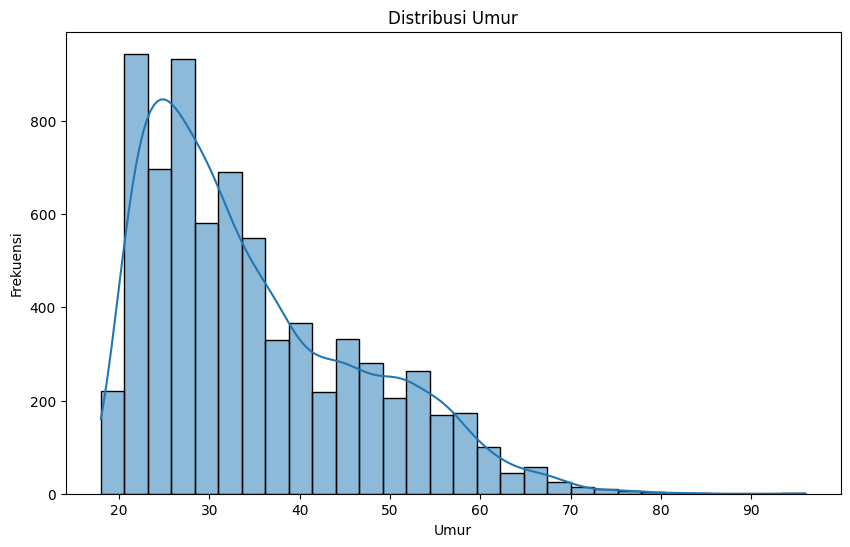

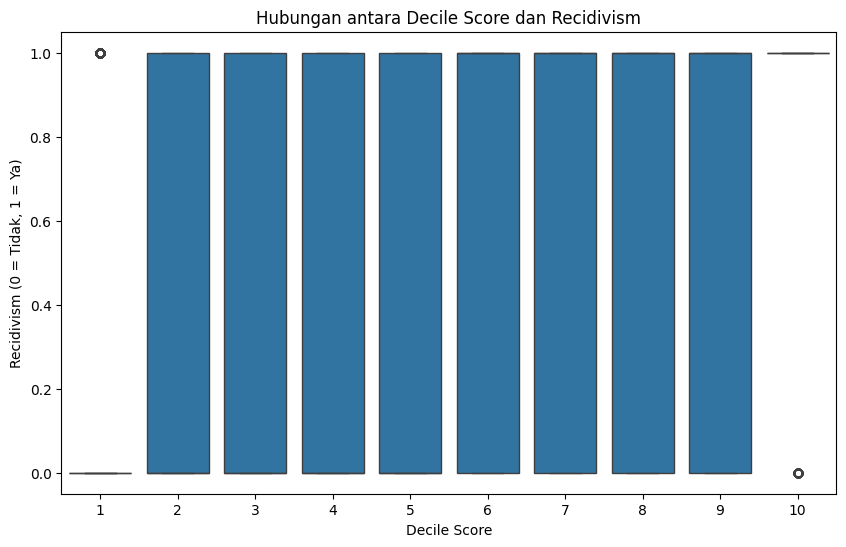

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()
# Melihat hubungan antara decile_score dan two_year_recid
plt.figure(figsize=(10, 6))
sns.boxplot(x='decile_score', y='two_year_recid', data=data)
plt.title('Hubungan antara Decile Score dan Recidivism')
plt.xlabel('Decile Score')
plt.ylabel('Recidivism (0 = Tidak, 1 = Ya)')
plt.show()

# 4. Data Visualization


# Menghitung matriks korelasi hanya untuk kolom numerik

In [11]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()


## Visualisasi hubungan antara fitur

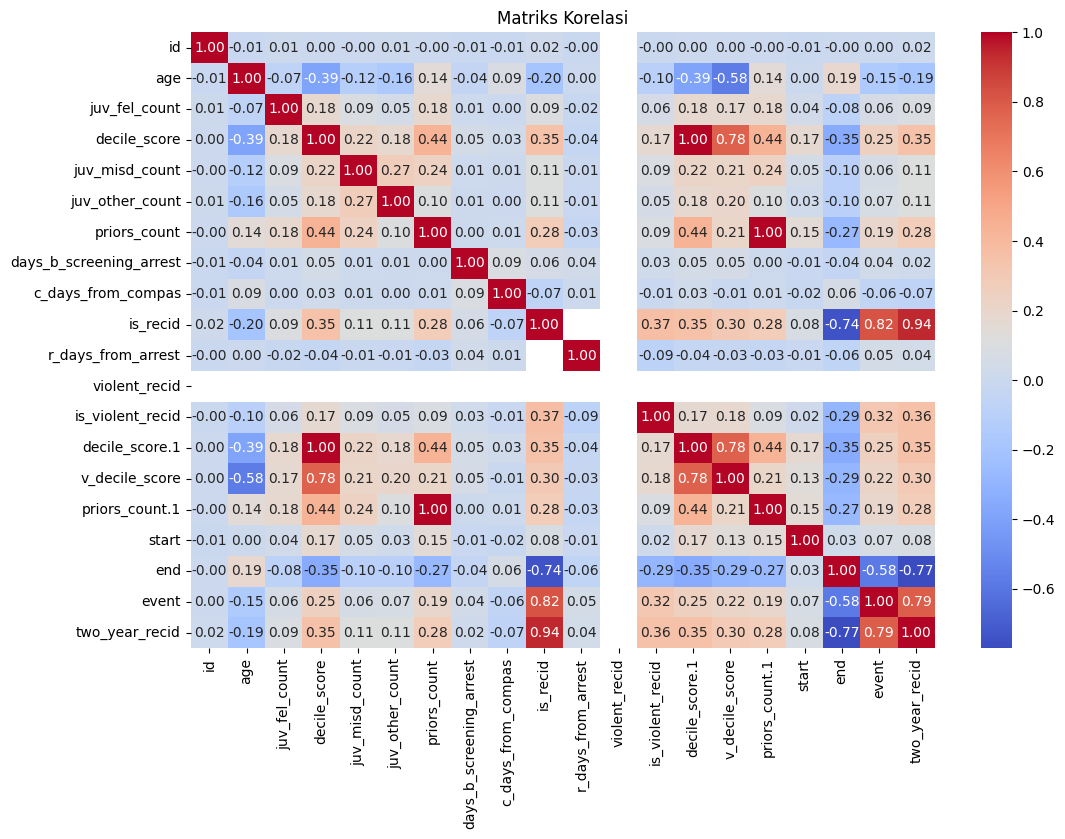

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

# 5. Model Evaluation


## Memisahkan data menjadi fitur dan target

In [13]:
X = data[['age', 'decile_score', 'priors_count']]
y = data['two_year_recid']



## Membagi data menjadi data latih dan data uji

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



## Membangun model Random Forest

In [15]:
model = RandomForestClassifier()
model.fit(X_train, y_train)



RandomForestClassifier()

## Melakukan prediksi

In [16]:
y_pred = model.predict(X_test)



## Menghitung metrik evaluasi

In [17]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])



## Menampilkan hasil evaluasi

In [18]:
print(f'Akurasi: {accuracy:.2f}')
print(f'Presisi: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC: {roc_auc:.2f}')

Akurasi: 0.63
Presisi: 0.59
Recall: 0.56
F1 Score: 0.57
AUC: 0.67


  # Penjelasan Matematis
  ## **Akurasi**
  Akurasi mengukur seberapa sering model memprediksi dengan benar dari keseluruhan data.


  $\text{Akurasi} = \frac{TP + TN}{TP + TN + FP + FN}$


  Di mana:
  * TP (True Positive): Jumlah kasus positif yang diprediksi dengan benar.
  * TN (True Negative): Jumlah kasus negatif yang diprediksi dengan benar.
  * FP (False Positive): Jumlah kasus negatif yang salah diprediksi sebagai positif.
  * FN (False Negative): Jumlah kasus positif yang salah diprediksi sebagai negatif.

Semakin tinggi nilai akurasi, semakin baik model dalam mengklasifikasikan data.

  ## **Presisi**
  Presisi mengukur seberapa akurat model dalam memprediksi kelas positif.

  $\text{Presisi} = \frac{TP}{TP + FP}$

  Presisi tinggi berarti bahwa dari semua kasus yang diprediksi sebagai positif, sebagian besar benar-benar positif. Metrik ini penting dalam kasus di mana kesalahan False Positive harus diminimalkan.

  ## **Recall**
  Recall mengukur seberapa baik model dalam menemukan semua kasus positif.

  $\text{Recall} = \frac{TP}{TP + FN}$

  Recall tinggi menunjukkan bahwa model dapat menangkap sebagian besar kasus positif. Recall lebih diutamakan dalam situasi di mana kesalahan False Negative memiliki dampak yang besar, seperti dalam diagnosis penyakit.

  ## **F1-Score**
  F1-Score adalah rata-rata harmonik antara presisi dan recall, berguna untuk menyeimbangkan keduanya.

  $F1 = 2 \times \frac{\text{Presisi} \times \text{Recall}}{\text{Presisi} + \text{Recall}}$

  F1-Score digunakan ketika dataset memiliki distribusi kelas yang tidak seimbang, karena mempertimbangkan baik False Positives maupun False Negatives.

  ## **AUC dan ROC**
  AUC adalah area di bawah kurva ROC, yang mengukur seberapa baik model dapat membedakan antara dua kelas.